# Hito 1 - PRUEBA 1

## Sesión Presencial 1


__Nombre__ : Alejandra Aravena

- Al final de la sesión, el alumno (o pareja) debe completar el punto de Preliminares, así como Aspectos computacionales.
- Elementos comunes a considerar en éste hito:

    - Los dos enunciados deben estar clarificados, considerando el tipo de problema a resolver.
    - Para cada uno de los enunciados se deben considerar las librerías a implementar. (1 punto)
    - El tipo de métricas a implementar, ¿Qué estrategia de división de muestras?, ¿Qué tipo de preprocesamiento se implementará? (2 puntos)
    - Para cada enunciado, se deben declarar por lo menos cinco modelos con una grilla de hiperparámetros tentativa. (2 puntos)
- Entregable: Dos notebooks (uno por enunciado) con todos los puntos detallados.

# Preliminares

- __DESCRIPCION  DEL PROBLEMA__ : A continuación se presenta una base de datos con textos extraidos de distintos tweets. 
Cada texto hace referencia a un sentimiento, y se requiere clasificar que tipo de sentimiento es. 


- __OBJETIVOS__ : El objetivo general de esta prueba es alcanzar el mejor desempeño posible para clasificar si un
tweet es positivo o negativo. En base a lo anterior, el problema corresponde a clasificación.


- __SOLUCION A IMPLEMENTAR__ : 

* Para la división de muestras se implementará un __train test split__ con semilla aleatoria y  un test_zize de un .33%
* Para el pre-procesamiento de los datos :
        * Búsqueda y eliminación de datos nulos
        * Para preprocesar los tweets, los datos serán transformados  a lower case.
        * La alta ocurrencia de palabras comunes será eliminada mediante la declaración de stop words
        * La exclusión de stop words se realizará mediante el uso de la librería nltk . // __duda__




- __CRITERIOS DE OPTIMIZACION__: Los criterio de optimización se realizarán mediante la modificación de los hiperparametros





- __METRICAS DE CLASIFICACION__ :
    * Error Cuadrático Medio (MSE): El cual representa la expectativa del error cuadrático. Este indicador mide la calidad en cuanto menor sea el valor.

    * R-cuadrado: Representa la capacidad explicativa del conjunto de varibales en la variabilidad del vector objetivo, donde se mide de mejor manera con valores más altos.

    * Precission: La precisión es la relación entre las predicciones correctas y el número total de predicciones correctas previstas. Por ello, es una metrica a considerar.

    * Recall : Relación entre las predicciones positivas correctas y el número total de predicciones positivas. O más simplemente, cuán sensible es el clasificador para detectar instancias positivas. Esto también se conoce como la tasa verdadera positiva.

    * F1 : El puntaje F1 es la medida armónica de la memoria y la precisión, con una puntuación más alta como mejor modelo, por ende es un parametro a considerar.

    *  accuracy : La exactitud de la clasificación es la relación entre las predicciones correctas y el número total de predicciones. O más simplemente, con qué frecuencia es correcto el clasificador, por ende, es una metrica a utilizar 





__Binarización de variables__ :  Existencia de variables con posibilidad de asignación binaria, serán recodificados mediante __label enconder__




### Aspectos Computacionales

Para el desarrollo del modelo se debe seguir una serie de pasos, para los cuales, se requerirán las siguientes librerías:
* Ingesta y preprocesamiento:

    + `numpy`
    + `sklearn.preprocessing`
        - `StandardScaler`
    +  `nltk`
    + `sklearn.feature_extraction`
        - `CountVectorizer`
    
    
* Visualización:
    + `matplotlib.pyplot`
    + `seaborn`
    + `missingno`
    + `warnings`
    
    
* Modelación:
    + `statsmodels.api`
    + `statsmodels.formula.api`
    + `sklearn`
        - `linear_model` $\rightarrow$ `LinearRegression`
        - `model_selection` $\rightarrow$ `train_test_split`
        - `preprocessing`$\rightarrow$   `LabelEncoder`
        `pipeline`$\rightarrow$   `Pipeline`


    
    
* Evaluación:
    + `sklearn.metrics`
        - `mean_squared_error`
        - `r2_score`
        -  `roc_auc_score`
        - `roc_curve` 
        - `confusion_matrix`
        -  ` classification_report `
        
* Funciones externas:
    + `helpers.py`
    +  `preproc_nyc_sqf.py`
    + `Funciones_Ale` (Este archivo se irá modificando a medida que se requieran mas funciones)
        
     

# HITO 2



## Específicos prueba 1:

- Considerar el uso de algún preprocesador de texto ( CountVectorizer , TfidfVectorizer ) y definición de sus parámetros.
- Considerar la recodificación del vector objetivo y su estrategia de aleatorización.

In [1]:
# Importamos librerias básicas 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re 
import missingno as msng
from nltk.stem import WordNetLemmatizer 

warnings.simplefilter('ignore')
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('seaborn')

In [2]:
df = pd.read_csv('text_emotion.csv')
df.head()

tweet_id   sentiment       author  \
0  1956967341       empty   xoshayzers   
1  1956967666     sadness    wannamama   
2  1956967696     sadness    coolfunky   
3  1956967789  enthusiasm  czareaquino   
4  1956968416     neutral    xkilljoyx   

                                             content  
0  @tiffanylue i know  i was listenin to bad habi...  
1  Layin n bed with a headache  ughhhh...waitin o...  
2                Funeral ceremony...gloomy friday...  
3               wants to hang out with friends SOON!  
4  @dannycastillo We want to trade with someone w...

In [3]:
# No existen datos nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 4 columns):
tweet_id     40000 non-null int64
sentiment    40000 non-null object
author       40000 non-null object
content      40000 non-null object
dtypes: int64(1), object(3)
memory usage: 1.2+ MB


In [4]:
#transformamos a minuscula 
df = df.apply(lambda x: x.astype(str).str.lower())
df.head()

tweet_id   sentiment       author  \
0  1956967341       empty   xoshayzers   
1  1956967666     sadness    wannamama   
2  1956967696     sadness    coolfunky   
3  1956967789  enthusiasm  czareaquino   
4  1956968416     neutral    xkilljoyx   

                                             content  
0  @tiffanylue i know  i was listenin to bad habi...  
1  layin n bed with a headache  ughhhh...waitin o...  
2                funeral ceremony...gloomy friday...  
3               wants to hang out with friends soon!  
4  @dannycastillo we want to trade with someone w...

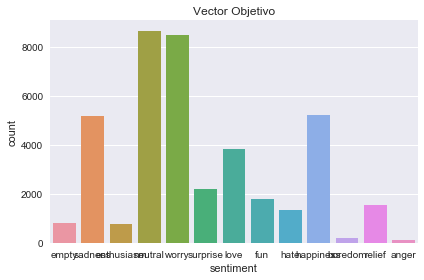

In [5]:
#Analisis exploratorio


#Analizar vector objetivo

sns.countplot(df['sentiment'])
plt.title('Vector Objetivo')
plt.tight_layout()
plt.show()


In [6]:
df.shape

(40000, 4)

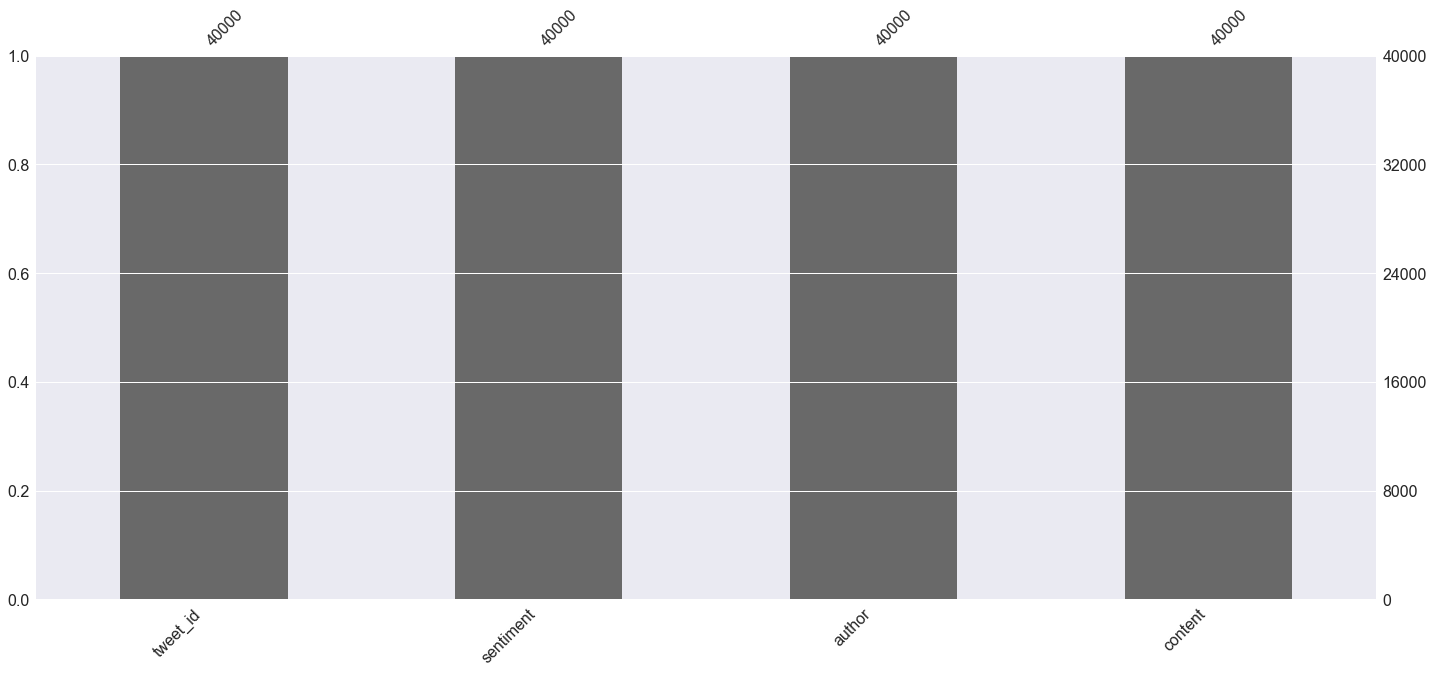

In [7]:
#Analizar patron de datos perdidos

msng.bar(df)

In [8]:
#No existen datos perdidos 

In [9]:
#Preparar vector objetivo: recodificar 'sentiment' de acuerdo a lo indicado
df['sentiment_bin'] = df['sentiment']
negative = ['empty', 'sadness', 'worry', 'hate', 'boredom', 'anger']
positive = ['enthusiasm', 'surprise', 'love', 'fun', 'happiness', 'relief']
for i in range (len(negative)):
    df['sentiment_bin'] = df['sentiment_bin'].replace(str(negative[i]), 'negative')
for i in range (len(positive)):
    df['sentiment_bin'] = df['sentiment_bin'].replace(str(positive[i]), 'positive')

In [10]:
df['sentiment_bin'].value_counts()

negative    16063
positive    15299
neutral      8638
Name: sentiment_bin, dtype: int64

In [19]:
#En el caso de 'neutral', asignar 'positivo' o 'negativo' de forma aleatoria:
np.random.seed(2112) # Semilla para replicabilidad de los tweets neutrales
df['sentiment_bin']=df['sentiment_bin'].replace('neutral',np.random.choice(['positive','negative']))

In [20]:
df['sentiment_bin'].value_counts()

negative    20251
positive    19749
Name: sentiment_bin, dtype: int64

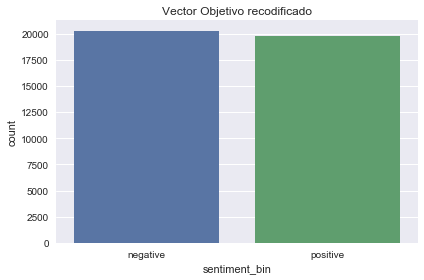

In [21]:
# nuevo countplot
#Analizar vector objetivo

sns.countplot(df['sentiment_bin'])
plt.title('Vector Objetivo recodificado')
plt.tight_layout()
plt.show()


In [22]:
#Limpiaremos la columna content de caracteres extraños 
df['content']=df['content'].map(lambda x:re.sub(r"(?:\@|https?\://)\S+", "",x))

In [24]:
df['content'].head(10)

0     i know  i was listenin to bad habit earlier a...
1    layin n bed with a headache  ughhhh...waitin o...
2                  funeral ceremony...gloomy friday...
3                 wants to hang out with friends soon!
4     we want to trade with someone who has houston...
5    re-pinging  why didn't you go to prom? bc my b...
6    i should be sleep, but im not! thinking about ...
7                                       hmmm.  is down
8                         charlene my love. i miss you
9                     i'm sorry  at least it's friday?
Name: content, dtype: object

In [36]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aleja\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [45]:
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

def tokenizador(contenido):
    ps=nltk.stem.PorterStemmer()
    stop_words = set(stopwords.words('english')) 
    temp=word_tokenize(contenido)
    filtro=[w for w in temp if not w in stop_words]
    stemmed=''
    for i in filtro:
        if i!=filtro[-1]:
            stemmed+=ps.stem(i)+' '
        else:
            stemmed += ps.stem(i)
    return stemmed


In [46]:
df['content_token']=df['content'].apply(tokenizador)

In [49]:
df['content_token'].head(2)

0    know listenin bad habit earlier start freakin ...
1        layin n bed headach ughhhh ...waitin call ...
Name: content_token, dtype: object

In [59]:
#contar ocurrencias 
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer=CountVectorizer(stop_words='english',max_features=1000) #instanciar objeto
count_vectorizer_fit = count_vectorizer.fit_transform(df['content_token']) #fit y transform
words = count_vectorizer.get_feature_names() # extraer los tokens
words_frecuencia = count_vectorizer_fit.toarray().sum(axis=0) #extraer la frecuencia

df_words_f= pd.DataFrame({'words':words,'words_frecuencia':words_frecuencia})
df_words_f=df_words_f.sort_values(by='words_frecuencia',ascending=False)



In [61]:
df_words_f.head(10)

words  words_frecuencia
225    day              3571
362   good              2326
968   work              2196
528   love              2113
507   like              2072
686   quot              1884
368    got              1871
875  today              1666
872   time              1562
390  happi              1503